In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import set_printoptions

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif


In [354]:
tb = pd.read_csv('/kaggle/input/tablets/tablet.csv')
tb = tb.copy()


# Veri tanıma ve Görselleştirme
hedef değişkenin dengeli olup olmadığının incelenmesi
korelasyon matrisleri, anlamlı değişkenler arası korelasyon katsayıları yorumlanması
sayısal değişkenler: ortalama, medyan, std. sapma değerleri
sayısal ve kategorik değişkenlerin ideal teknik ve araçlarla görselleştirilip yorumlanması.


In [355]:
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [356]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [357]:
tb.shape #2k gözlem 20 değişken

(2000, 20)

In [358]:
tb.isna().sum() #12 RAM ve 5 tane OnKameraMP verisi eksiktir.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [359]:
print(tb.columns)

# Doğru sütun adlarını kullanarak numeric_columns listesini güncelleme
numeric_columns = ['BataryaGucu', 'MikroislemciHizi','OnKameraMP', 'Kalinlik', 'Agirlik', 'CekirdekSayisi', 
                   'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru']

# Eksik verileri doldurmak için SimpleImputer kullanma
imputer = SimpleImputer(strategy='mean')  # Sayısal değişkenler için ortalama ile doldur

# Sayısal sütunlardaki eksik değerleri doldurma
tb[numeric_columns] = imputer.fit_transform(tb[numeric_columns])

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')


In [360]:
# Sıralı kategorik değerleri numaralandırma
tb['FiyatAraligi'] = tb['FiyatAraligi'].replace({'Çok Ucuz': 0, 'Ucuz': 1, 'Normal': 2, 'Pahalı': 3, 'Çok Pahalı': 4}).infer_objects()


/tmp/ipykernel_33/2394670883.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tb['FiyatAraligi'] = tb['FiyatAraligi'].replace({'Çok Ucuz': 0, 'Ucuz': 1, 'Normal': 2, 'Pahalı': 3, 'Çok Pahalı': 4}).infer_objects()


In [361]:
tb.isna().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

In [362]:
print(tb.columns)

# Doğru sütun adlarını kullanarak numeric_columns listesini güncelleme
numeric_columns = ['BataryaGucu', 'MikroislemciHizi','OnKameraMP', 'Kalinlik', 'Agirlik', 'CekirdekSayisi', 
                   'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru']

# Eksik verileri doldurmak için SimpleImputer kullanma
imputer = SimpleImputer(strategy='mean')  # Sayısal değişkenler için ortalama ile doldur

# Sayısal sütunlardaki eksik değerleri doldurma
tb[numeric_columns] = imputer.fit_transform(tb[numeric_columns])

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')


In [363]:
tb.isnull()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [364]:
print(tb["RAM"].unique()) #boş değerler
print(tb["OnKameraMP"].unique())

try:
    print(tb.loc[2328, 'RAM'])
except (ValueError, KeyError):
    print("Değer bulunamadı.")
    

[2328. 3863. 1734. ... 3557. 3653. 2273.]
[ 2.     0.     1.    12.     9.    10.     4.     7.    13.    11.
  5.     3.     6.     8.    14.    16.    18.    15.     4.312 19.
 17.   ]
Değer bulunamadı.


In [365]:
tb["FiyatAraligi"].head()

int_float_columns = tb.select_dtypes(include=['int', 'float'])
print(int_float_columns)

      BataryaGucu  MikroislemciHizi  OnKameraMP  DahiliBellek  Kalinlik  \
0          1325.0               1.9         2.0            50       0.1   
1          1046.0               2.8         0.0            58       0.2   
2           843.0               1.3         1.0            16       0.9   
3           894.0               0.5         1.0            50       0.5   
4           936.0               1.0         1.0            18       0.2   
...           ...               ...         ...           ...       ...   
1995        689.0               2.9         3.0             7       0.8   
1996       1654.0               1.8         1.0            11       0.3   
1997        742.0               2.2         4.0            56       0.2   
1998        704.0               2.2         4.0            53       0.2   
1999       1872.0               0.5         5.0            26       0.5   

      Agirlik  CekirdekSayisi  ArkaKameraMP  CozunurlukYükseklik  \
0       146.0             1.0  

In [366]:
# Sıralı kategorik değerleri numaralandırma
tb['FiyatAraligi'] = tb['FiyatAraligi'].replace({'Çok Ucuz': 0, 'Ucuz': 1, 'Normal': 2, 'Pahalı': 3, 'Çok Pahalı': 4}).infer_objects()

# Veriyi kontrol etme
print(tb.head())

   BataryaGucu Bluetooth  MikroislemciHizi CiftHat  OnKameraMP   4G  \
0       1325.0       Yok               1.9     Yok         2.0  Yok   
1       1046.0       Var               2.8     Var         0.0  Var   
2        843.0       Yok               1.3     Var         1.0  Yok   
3        894.0       Yok               0.5     Var         1.0  Var   
4        936.0       Yok               1.0     Yok         1.0  Yok   

   DahiliBellek  Kalinlik  Agirlik  CekirdekSayisi  ArkaKameraMP  \
0            50       0.1    146.0             1.0          10.0   
1            58       0.2    100.0             8.0           0.0   
2            16       0.9    119.0             7.0           4.0   
3            50       0.5    199.0             3.0          14.0   
4            18       0.2    153.0             3.0          18.0   

   CozunurlukYükseklik  CozunurlukGenislik     RAM  BataryaOmru   3G  \
0                499.0               695.0  2328.0          2.0  Var   
1                259

In [367]:
object_columns = tb.select_dtypes(include = ['object'])
print(object_columns)

     Bluetooth CiftHat   4G   3G Dokunmatik WiFi     Renk
0          Yok     Yok  Yok  Var        Yok  Yok    Beyaz
1          Var     Var  Var  Var        Var  Var    Pembe
2          Yok     Var  Yok  Yok        Yok  Var      Mor
3          Yok     Var  Var  Var        Yok  Var  Turuncu
4          Yok     Yok  Yok  Var        Var  Var    Beyaz
...        ...     ...  ...  ...        ...  ...      ...
1995       Yok     Var  Var  Var        Yok  Yok    Siyah
1996       Yok     Yok  Yok  Var        Var  Var     Sarı
1997       Yok     Var  Yok  Yok        Var  Var  Turuncu
1998       Yok     Var  Yok  Var        Var  Var  Turkuaz
1999       Yok     Yok  Var  Var        Yok  Var    Siyah

[2000 rows x 7 columns]


In [368]:
tb.describe().T #sayısal değişkenlerin temel istatistik değerleri

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.000000,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.500000,2.20,3.0
OnKameraMP,2000.0,4.312281,4.336661,0.0,1.00,3.000000,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.000000,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.500000,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.000000,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.000000,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.000000,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.000000,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.000000,1633.00,1998.0


In [369]:
tb.groupby(["FiyatAraligi"]).describe()[[("RAM"), ("BataryaGucu")]]
#Batarya gücünün çok da değişmediğini görüyoruz

RAM                                                         \
              count         mean         std          min      25%     50%   
FiyatAraligi                                                                 
0             500.0   785.314000  362.755397   256.000000   488.75   719.5   
1             500.0  1679.490000  465.850159   387.000000  1354.00  1686.5   
2             500.0  2582.816000  496.211735  1185.000000  2292.75  2577.0   
3             500.0  3417.355855  436.918424  2116.243964  3166.50  3488.0   

                              BataryaGucu                               \
                  75%     max       count      mean         std    min   
FiyatAraligi                                                             
0             1037.00  1974.0       500.0  1116.902  410.801305  503.0   
1             2033.75  2811.0       500.0  1228.868  438.614528  501.0   
2             2927.00  3916.0       500.0  1228.320  452.863065  501.0   
3             3761.25  3998.0       500.0  1379.984  414.992261  503.0   

                                                
                  25%     50%      75%     max  
FiyatAraligi                                    
0              770.50  1066.0  1431.25  1994.0  
1              843.00  1206.0  1596.25  1996.0  
2              816.50  1219.5  1635.75  1998.0  
3             1034.75  1449.5  1733.50  1994.0

In [370]:
tb.groupby(["FiyatAraligi"]).describe()[[("BataryaGucu")]]

BataryaGucu                                                \
                   count      mean         std    min      25%     50%   
FiyatAraligi                                                             
0                  500.0  1116.902  410.801305  503.0   770.50  1066.0   
1                  500.0  1228.868  438.614528  501.0   843.00  1206.0   
2                  500.0  1228.320  452.863065  501.0   816.50  1219.5   
3                  500.0  1379.984  414.992261  503.0  1034.75  1449.5   

                               
                  75%     max  
FiyatAraligi                   
0             1431.25  1994.0  
1             1596.25  1996.0  
2             1635.75  1998.0  
3             1733.50  1994.0

# Değerlerin görselleştirilmesi

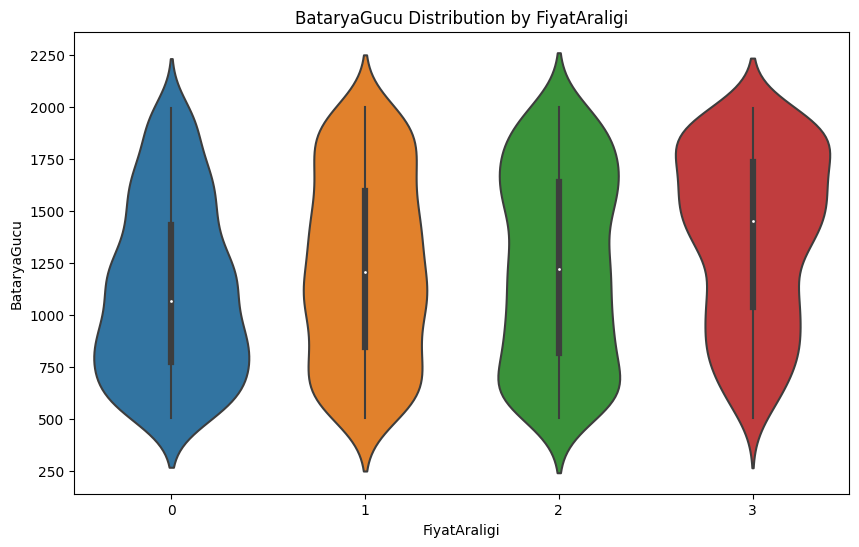

In [371]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="FiyatAraligi", y="BataryaGucu", data=tb)
plt.title("BataryaGucu Distribution by FiyatAraligi")
plt.xlabel("FiyatAraligi")
plt.ylabel("BataryaGucu")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


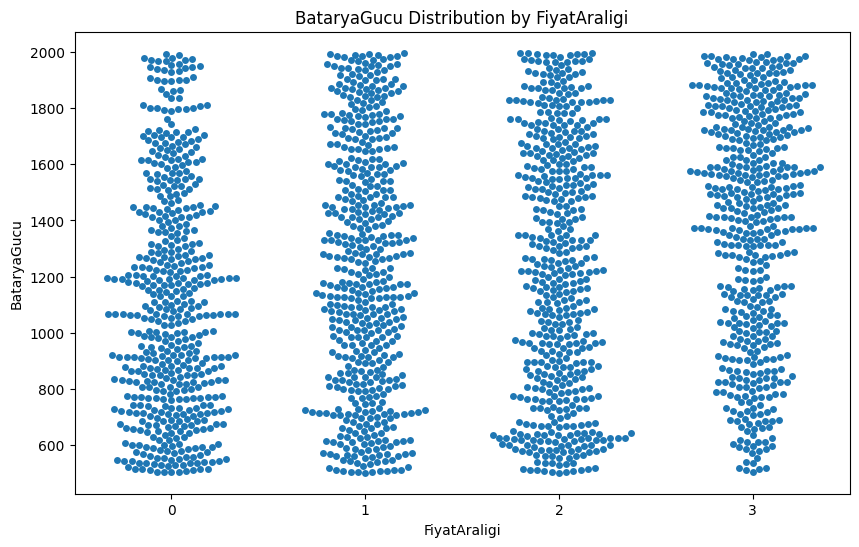

In [372]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="FiyatAraligi", y="BataryaGucu", data=tb)
plt.title("BataryaGucu Distribution by FiyatAraligi")
plt.xlabel("FiyatAraligi")
plt.ylabel("BataryaGucu")
plt.show()

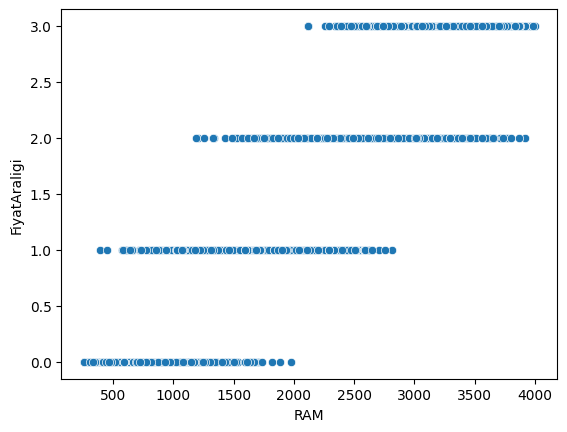

In [373]:
sns.scatterplot(x = "RAM", y = "FiyatAraligi", data = tb);  #Müşterilerin verdiği ücret ile tabletin RAM'i arasındaki ilişki

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


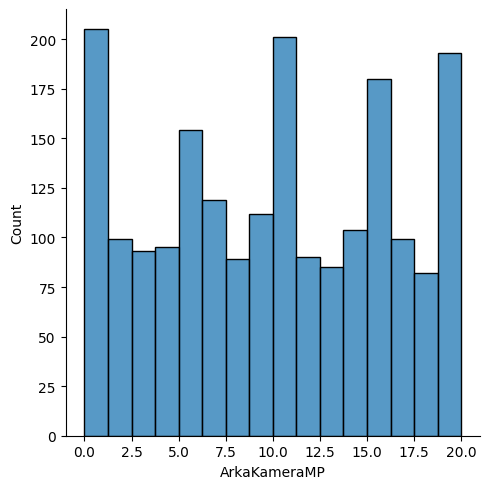

In [374]:
sns.displot(tb["ArkaKameraMP"], bins=16);

In [375]:
tb.groupby(["FiyatAraligi"]).describe()[[("ArkaKameraMP")]]

ArkaKameraMP                                              
                    count    mean       std  min  25%   50%   75%   max
FiyatAraligi                                                           
0                   500.0   9.574  6.095805  0.0  4.0   9.5  15.0  20.0
1                   500.0   9.924  6.124806  0.0  4.0  10.0  15.0  20.0
2                   500.0  10.018  5.952861  0.0  5.0  10.0  15.0  20.0
3                   500.0  10.150  6.085521  0.0  5.0  10.0  16.0  20.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


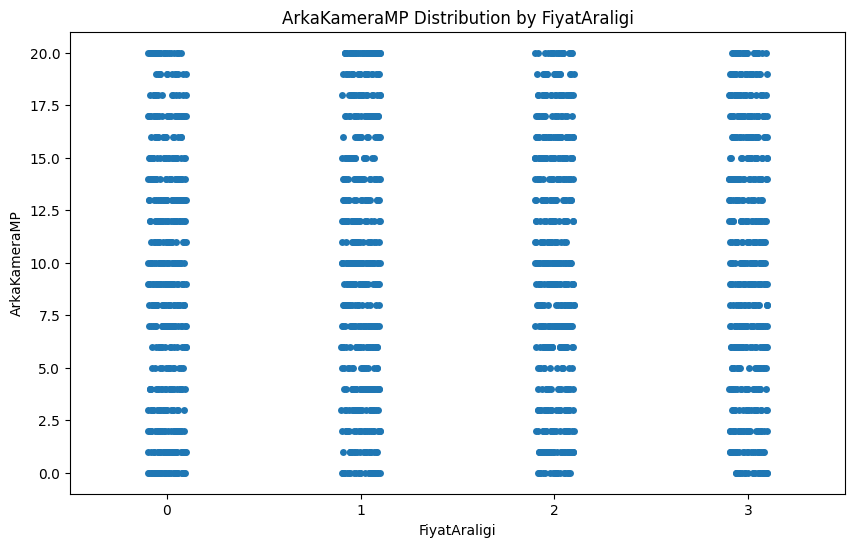

In [376]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="FiyatAraligi", y="ArkaKameraMP", data=tb)
plt.title("ArkaKameraMP Distribution by FiyatAraligi")
plt.xlabel("FiyatAraligi")
plt.ylabel("ArkaKameraMP")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


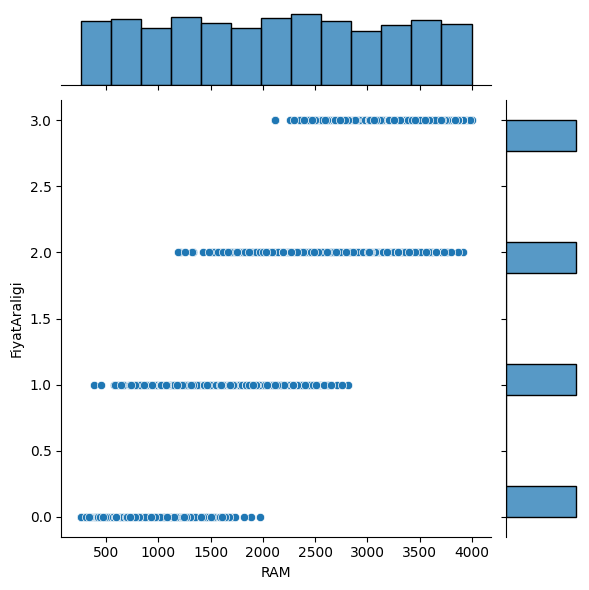

In [377]:
sns.jointplot(x="RAM", y="FiyatAraligi", data=tb);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


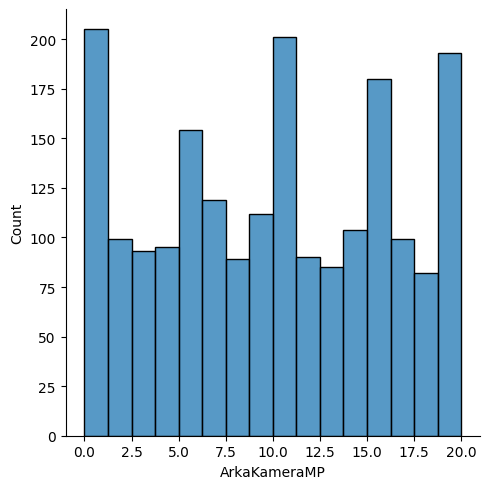

In [378]:
sns.displot(tb["ArkaKameraMP"], bins=16);

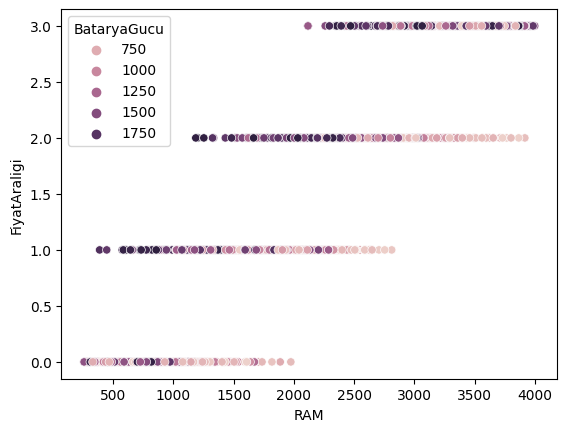

In [379]:
sns.scatterplot(x = "RAM", y = "FiyatAraligi", hue = "BataryaGucu",  data = tb); #Müşterilerin ödedikleri ücret ile tabletin RAM'i arasındaki ilişkiyi batarya gücüyle beraber açıkladık

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


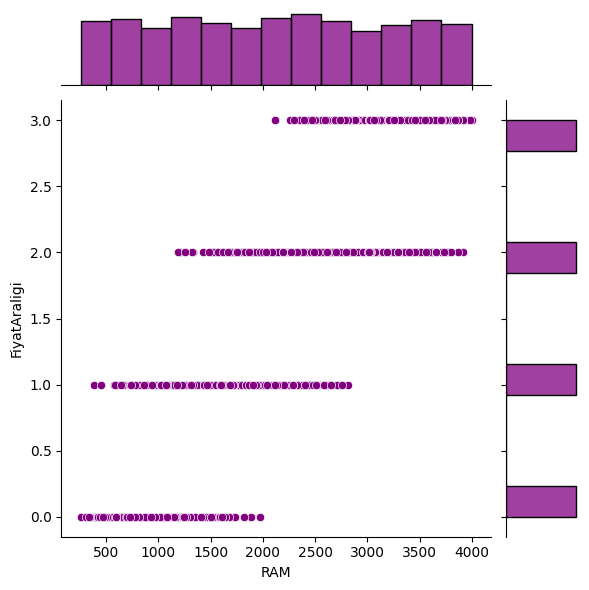

In [380]:
sns.jointplot(x = "RAM", y = "FiyatAraligi", data = tb, color="purple"); #gözlemlerin yoğunluğuna bakılır

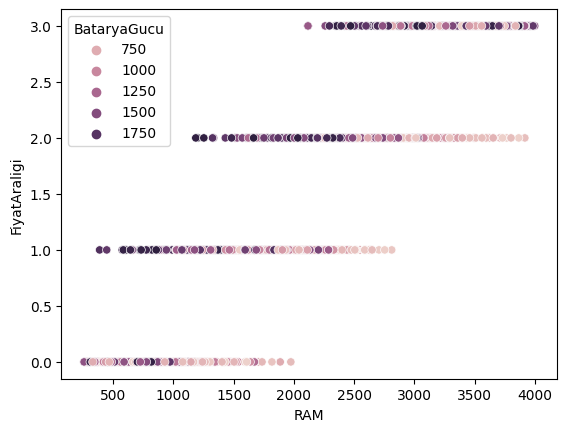

In [381]:
sns.scatterplot(x = "RAM", y = "FiyatAraligi", hue = "BataryaGucu",  data = tb); #Müşterilerin ödedikleri ücret ile tabletin RAM'i arasındaki ilişkiyi batarya gücüyle beraber açıkladık

/tmp/ipykernel_33/1515275380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tb["BataryaGucu"], bins=8, color="blue"); #Batarya gücünün dağılımının histogram grafikle gösterimi
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


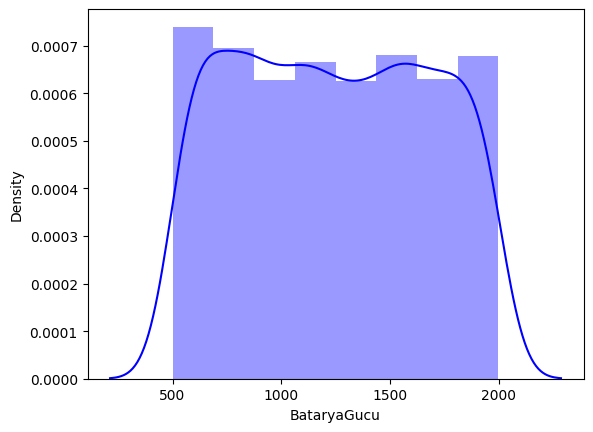

In [382]:
sns.distplot(tb["BataryaGucu"], bins=8, color="blue"); #Batarya gücünün dağılımının histogram grafikle gösterimi

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1000x600 with 0 Axes>

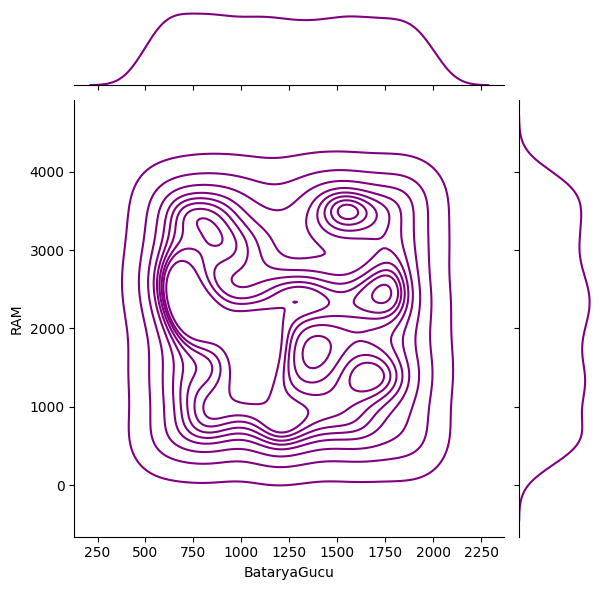

<Figure size 1000x600 with 0 Axes>

In [383]:
sns.jointplot(x = tb["BataryaGucu"], y = tb["RAM"], kind = "kde", color = "purple");
plt.figure(figsize=(10, 6))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the mar

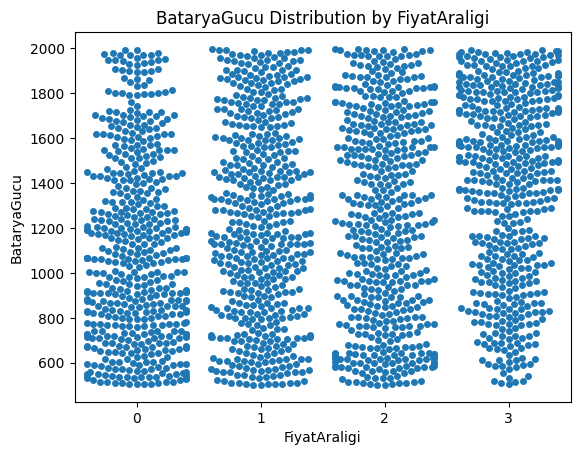

In [384]:
sns.swarmplot(x="FiyatAraligi", y="BataryaGucu", data=tb)
plt.title("BataryaGucu Distribution by FiyatAraligi")
plt.xlabel("FiyatAraligi")
plt.ylabel("BataryaGucu")
plt.show()

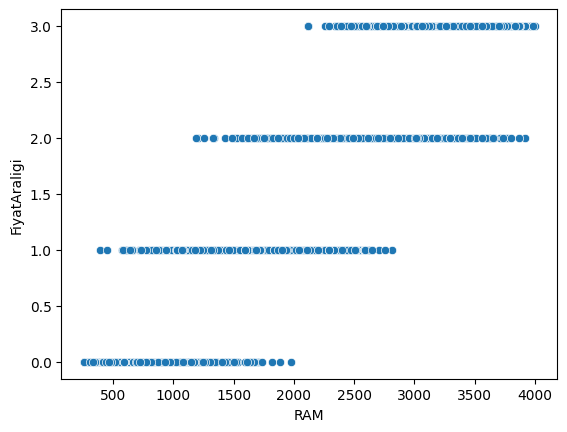

In [385]:
sns.scatterplot(x = "RAM", y = "FiyatAraligi", data = tb);  #Müşterilerin verdiği ücret ile tabletin RAM'i arasındaki ilişki

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


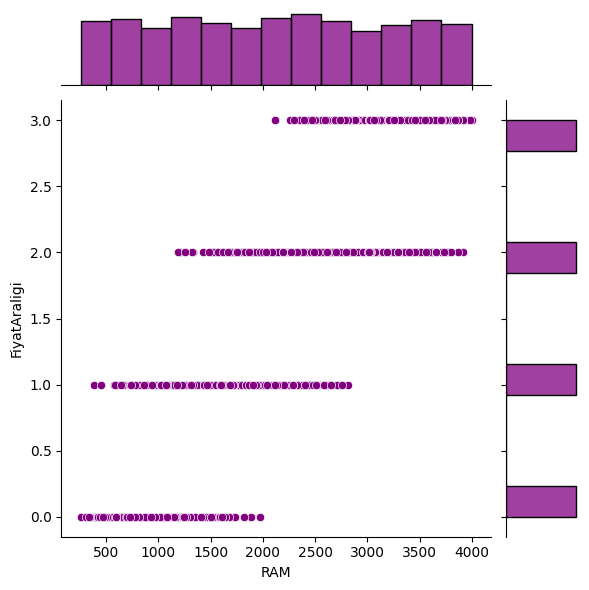

In [386]:
sns.jointplot(x = "RAM", y = "FiyatAraligi", data = tb, color="purple"); #gözlemlerin yoğunluğuna bakılır

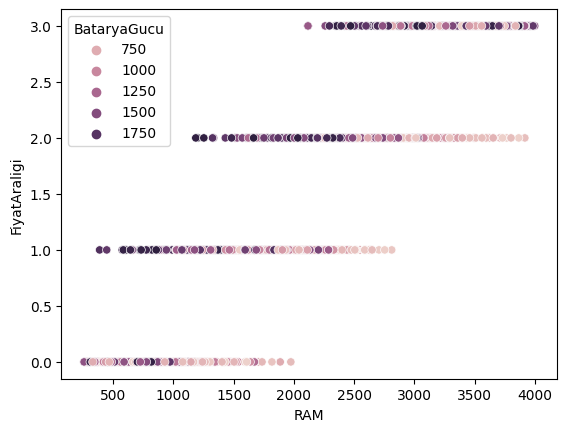

In [387]:
sns.scatterplot(x = "RAM", y = "FiyatAraligi", hue = "BataryaGucu",  data = tb); #Müşterilerin ödedikleri ücret ile tabletin RAM'i arasındaki ilişkiyi batarya gücüyle beraber açıkladık

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

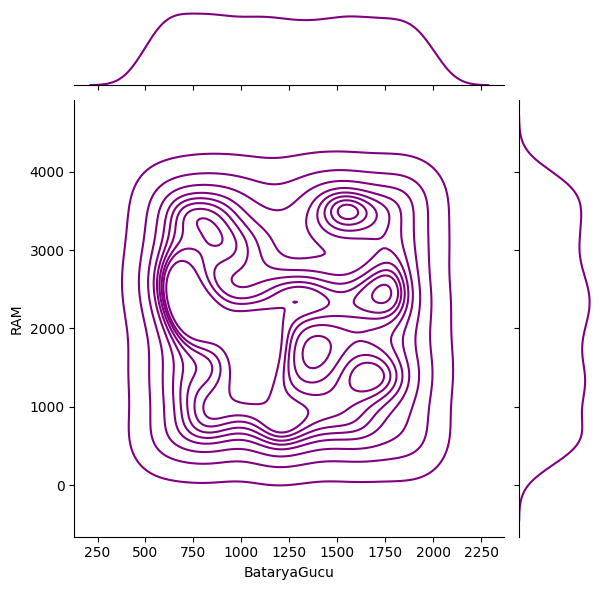

In [388]:
sns.jointplot(x = tb["BataryaGucu"], y = tb["RAM"], kind = "kde", color = "purple");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


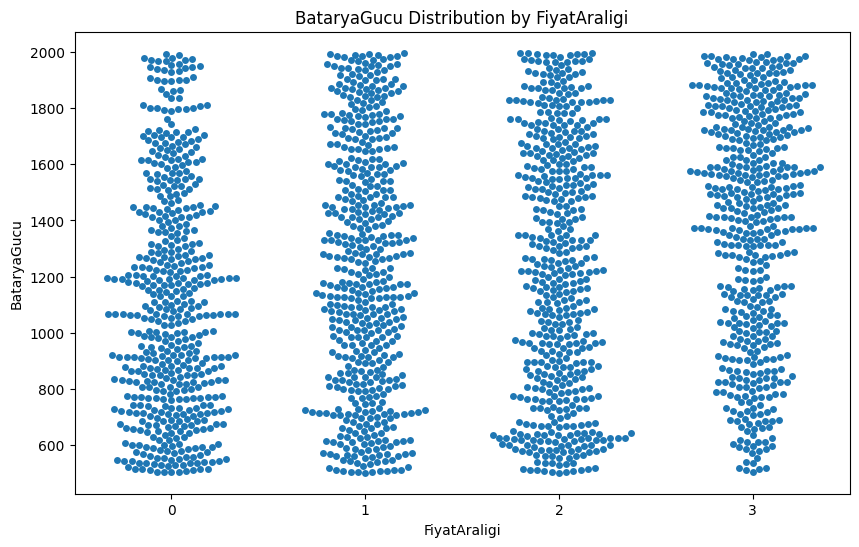

In [389]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="FiyatAraligi", y="BataryaGucu", data=tb)
plt.title("BataryaGucu Distribution by FiyatAraligi")
plt.xlabel("FiyatAraligi")
plt.ylabel("BataryaGucu")
plt.show()

In [390]:
tb.groupby(["FiyatAraligi"]).describe()[[("ArkaKameraMP")]]

ArkaKameraMP                                              
                    count    mean       std  min  25%   50%   75%   max
FiyatAraligi                                                           
0                   500.0   9.574  6.095805  0.0  4.0   9.5  15.0  20.0
1                   500.0   9.924  6.124806  0.0  4.0  10.0  15.0  20.0
2                   500.0  10.018  5.952861  0.0  5.0  10.0  15.0  20.0
3                   500.0  10.150  6.085521  0.0  5.0  10.0  16.0  20.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


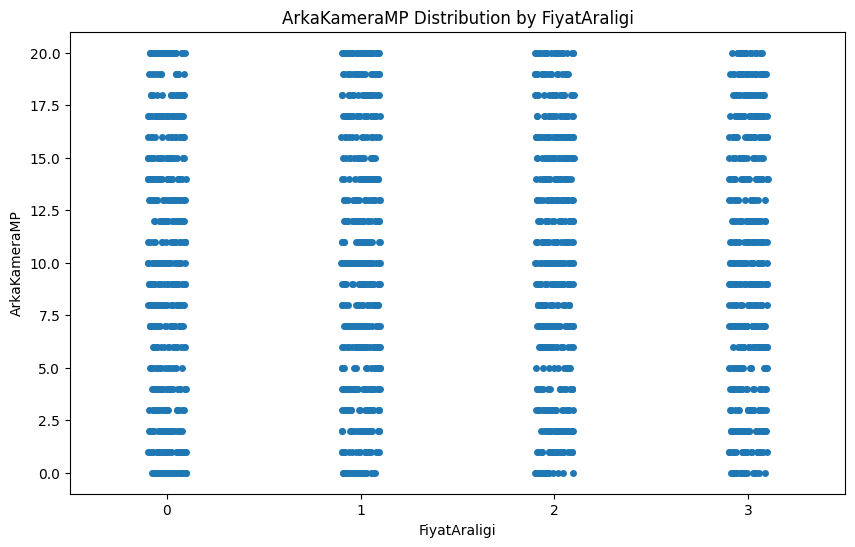

In [391]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="FiyatAraligi", y="ArkaKameraMP", data=tb)
plt.title( "ArkaKameraMP Distribution by FiyatAraligi")
plt.xlabel("FiyatAraligi")
plt.ylabel("ArkaKameraMP")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


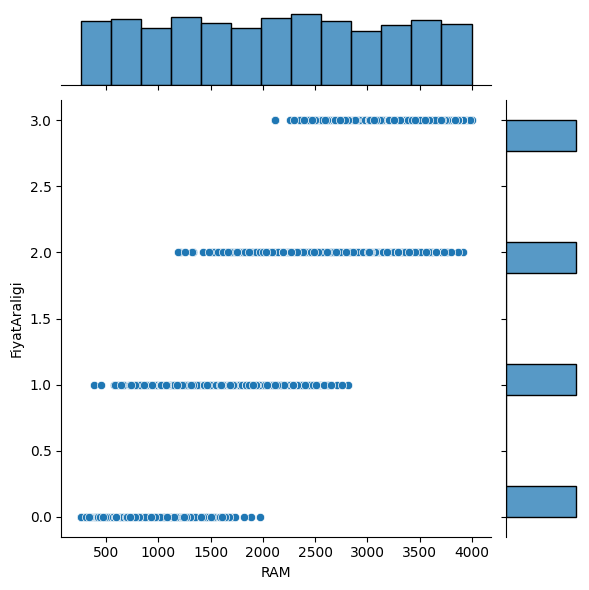

In [392]:
sns.jointplot(x="RAM", y="FiyatAraligi", data=tb);

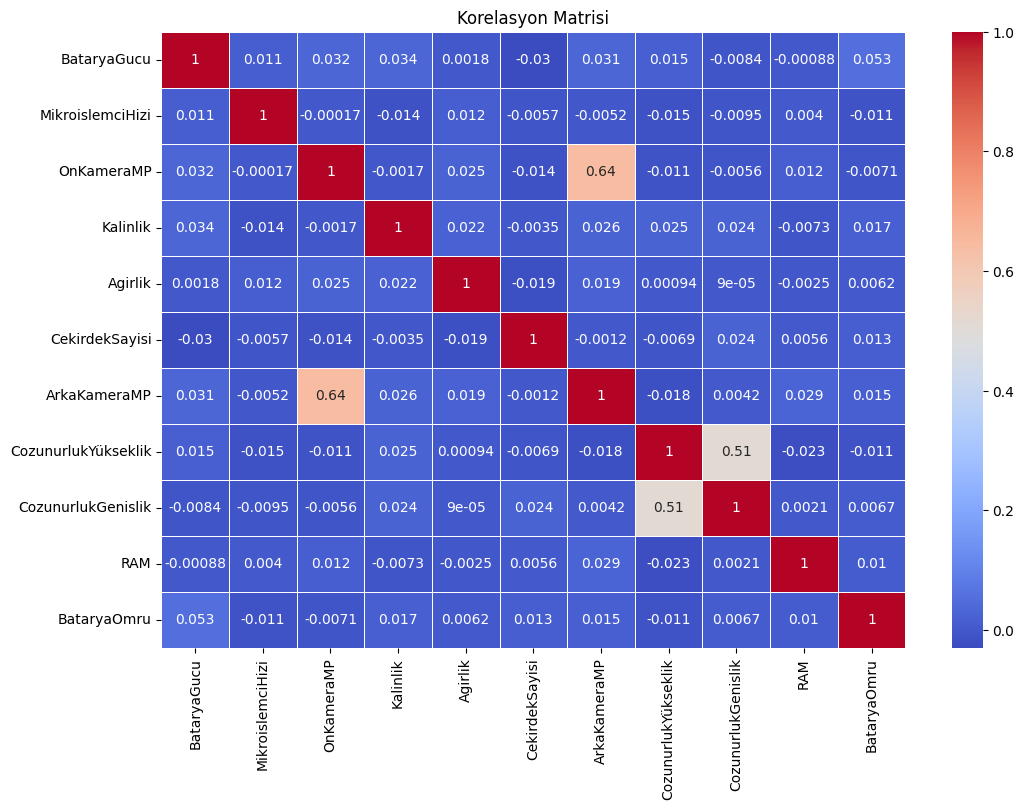

                     BataryaGucu  MikroislemciHizi  OnKameraMP  Kalinlik  \
BataryaGucu             1.000000          0.011482    0.032118  0.034085   
MikroislemciHizi        0.011482          1.000000   -0.000172 -0.014364   
OnKameraMP              0.032118         -0.000172    1.000000 -0.001722   
Kalinlik                0.034085         -0.014364   -0.001722  1.000000   
Agirlik                 0.001844          0.012350    0.024540  0.021756   
CekirdekSayisi         -0.029727         -0.005724   -0.013703 -0.003504   
ArkaKameraMP            0.031441         -0.005245    0.644530  0.026282   
CozunurlukYükseklik     0.014901         -0.014523   -0.010658  0.025263   
CozunurlukGenislik     -0.008402         -0.009476   -0.005645  0.023566   
RAM                    -0.000881          0.003960    0.012456 -0.007266   
BataryaOmru             0.052510         -0.011432   -0.007112  0.017003   

                      Agirlik  CekirdekSayisi  ArkaKameraMP  \
BataryaGucu          0.0

In [393]:
numeric_columns = ['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'Kalinlik', 
                   'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP', 
                   'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru']

# Sayısal sütunların bulunduğu DataFrame'i oluşturma
numeric_data = tb[numeric_columns]

# Korelasyon matrisini hesaplama
corr_matrix = numeric_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()
print(corr_matrix)

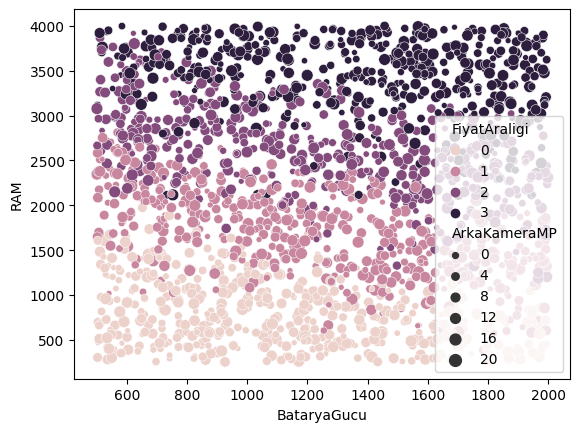

In [394]:
sns.scatterplot(x = "BataryaGucu", y = "RAM", hue = "FiyatAraligi", size = "ArkaKameraMP", data = tb);

/tmp/ipykernel_33/1515275380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tb["BataryaGucu"], bins=8, color="blue"); #Batarya gücünün dağılımının histogram grafikle gösterimi
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


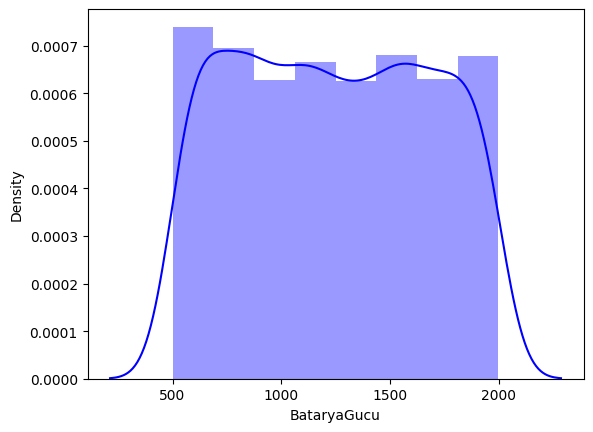

In [395]:
sns.distplot(tb["BataryaGucu"], bins=8, color="blue"); #Batarya gücünün dağılımının histogram grafikle gösterimi

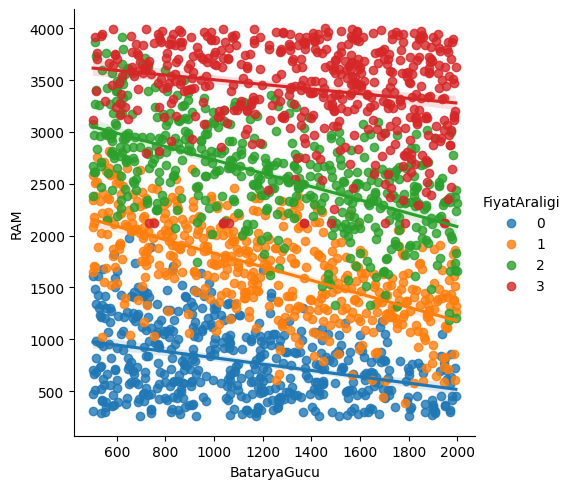

In [396]:
sns.lmplot(x = "BataryaGucu", y = "RAM", data = tb, hue = "FiyatAraligi");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


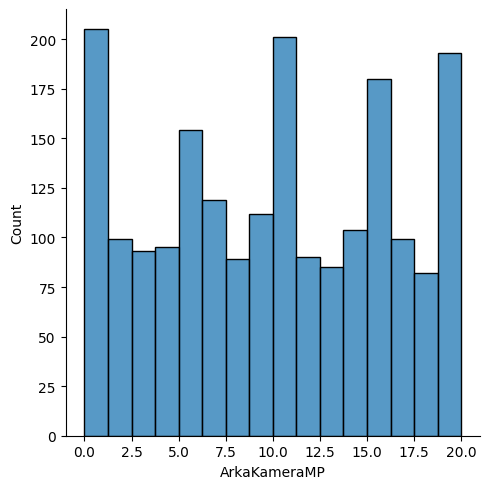

In [397]:
sns.displot(tb["ArkaKameraMP"], bins=16);

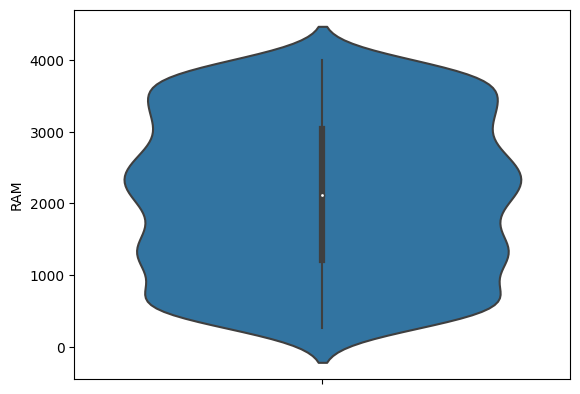

In [398]:
sns.violinplot(y = "RAM", data =tb);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


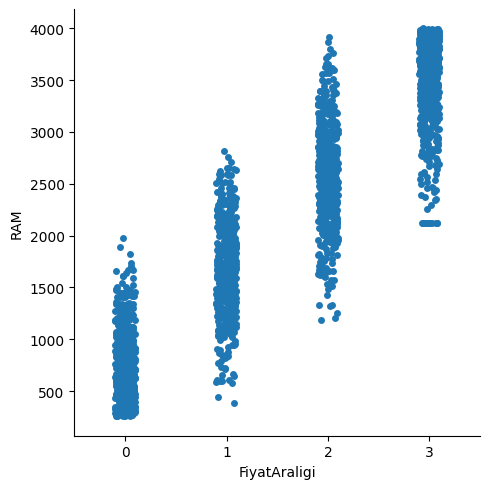

In [399]:
sns.catplot(x = "FiyatAraligi", y = "RAM", data = tb);

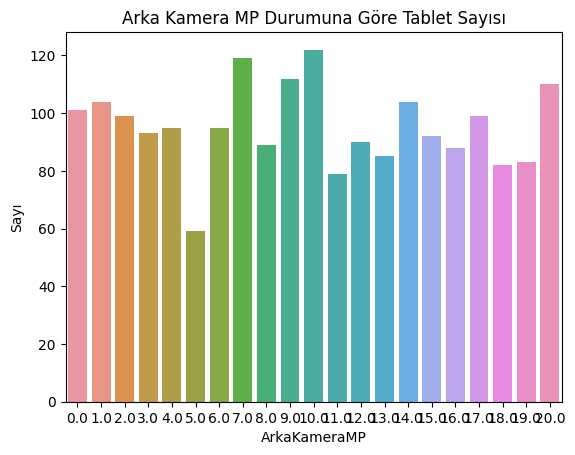

In [400]:
# Count plot oluşturma
sns.countplot(x="ArkaKameraMP", data=tb)
plt.xlabel("ArkaKameraMP")
plt.ylabel("Sayı")
plt.title("Arka Kamera MP Durumuna Göre Tablet Sayısı")
plt.show()

In [401]:
tb.isnull() #ben ekledim
# her bir hücrenin boş (NaN olarak ifade edilir) olup olmadığını belirtir.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Kategorik Değişkenler

In [402]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,Yok,1.9,Yok,2.0,Yok,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,Var,Yok,Yok,2,Beyaz
1,1046.0,Var,2.8,Var,0.0,Var,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,Var,Var,Var,3,Pembe
2,843.0,Yok,1.3,Var,1.0,Yok,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,Yok,Yok,Var,1,Mor
3,894.0,Yok,0.5,Var,1.0,Var,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,Var,Yok,Var,3,Turuncu
4,936.0,Yok,1.0,Yok,1.0,Yok,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,Var,Var,Var,2,Beyaz


In [403]:
tb['Dokunmatik'] = label_encoder.fit_transform(tb['Dokunmatik'])
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,Yok,1.9,Yok,2.0,Yok,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,Var,1,Yok,2,Beyaz
1,1046.0,Var,2.8,Var,0.0,Var,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,Var,0,Var,3,Pembe
2,843.0,Yok,1.3,Var,1.0,Yok,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,Yok,1,Var,1,Mor
3,894.0,Yok,0.5,Var,1.0,Var,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,Var,1,Var,3,Turuncu
4,936.0,Yok,1.0,Yok,1.0,Yok,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,Var,0,Var,2,Beyaz


In [404]:
tb['4G'] = label_encoder.fit_transform(tb['4G']) 
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,Yok,1.9,Yok,2.0,1,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,Var,1,Yok,2,Beyaz
1,1046.0,Var,2.8,Var,0.0,0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,Var,0,Var,3,Pembe
2,843.0,Yok,1.3,Var,1.0,1,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,Yok,1,Var,1,Mor
3,894.0,Yok,0.5,Var,1.0,0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,Var,1,Var,3,Turuncu
4,936.0,Yok,1.0,Yok,1.0,1,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,Var,0,Var,2,Beyaz


In [405]:
tb['3G'] = label_encoder.fit_transform(tb['3G']) 
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,Yok,1.9,Yok,2.0,1,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,0,1,Yok,2,Beyaz
1,1046.0,Var,2.8,Var,0.0,0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,0,0,Var,3,Pembe
2,843.0,Yok,1.3,Var,1.0,1,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,1,1,Var,1,Mor
3,894.0,Yok,0.5,Var,1.0,0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,0,1,Var,3,Turuncu
4,936.0,Yok,1.0,Yok,1.0,1,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,0,0,Var,2,Beyaz


In [406]:
tb['WiFi'] = label_encoder.fit_transform(tb['WiFi'])
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,Yok,1.9,Yok,2.0,1,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,0,1,1,2,Beyaz
1,1046.0,Var,2.8,Var,0.0,0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,0,0,0,3,Pembe
2,843.0,Yok,1.3,Var,1.0,1,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,1,1,0,1,Mor
3,894.0,Yok,0.5,Var,1.0,0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,0,1,0,3,Turuncu
4,936.0,Yok,1.0,Yok,1.0,1,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,0,0,0,2,Beyaz


In [407]:
tb['CiftHat'] = label_encoder.fit_transform(tb['CiftHat'])
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,Yok,1.9,1,2.0,1,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,0,1,1,2,Beyaz
1,1046.0,Var,2.8,0,0.0,0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,0,0,0,3,Pembe
2,843.0,Yok,1.3,0,1.0,1,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,1,1,0,1,Mor
3,894.0,Yok,0.5,0,1.0,0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,0,1,0,3,Turuncu
4,936.0,Yok,1.0,1,1.0,1,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,0,0,0,2,Beyaz


In [408]:
tb['Bluetooth'] = label_encoder.fit_transform(tb['Bluetooth']) 
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,1,1.9,1,2.0,1,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,0,1,1,2,Beyaz
1,1046.0,0,2.8,0,0.0,0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,0,0,0,3,Pembe
2,843.0,1,1.3,0,1.0,1,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,1,1,0,1,Mor
3,894.0,1,0.5,0,1.0,0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,0,1,0,3,Turuncu
4,936.0,1,1.0,1,1.0,1,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,0,0,0,2,Beyaz


# Gaussian

In [409]:
#  X ve Y tanımlanması
y = tb['FiyatAraligi']
X = tb.drop(['FiyatAraligi','Renk', 'Bluetooth', 'CiftHat', '4G', '3G', 'Dokunmatik', 'WiFi'], axis=1)

In [410]:
#Bağımlı değişkenimiz y'i görüntüleyelim.
y

0       2
1       3
2       1
3       3
4       2
       ..
1995    0
1996    1
1997    3
1998    2
1999    2
Name: FiyatAraligi, Length: 2000, dtype: int64

In [411]:
#Bağımsız değişkenimiz x'i görüntüleyelim.
X

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
0,1325.0,1.9,2.0,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0
1,1046.0,2.8,0.0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0
2,843.0,1.3,1.0,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0
3,894.0,0.5,1.0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0
4,936.0,1.0,1.0,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689.0,2.9,3.0,7,0.8,147.0,2.0,6.0,487.0,722.0,1241.0,16.0
1996,1654.0,1.8,1.0,11,0.3,146.0,7.0,2.0,1184.0,1719.0,1070.0,14.0
1997,742.0,2.2,4.0,56,0.2,190.0,7.0,14.0,577.0,1359.0,3557.0,12.0
1998,704.0,2.2,4.0,53,0.2,186.0,6.0,6.0,251.0,1013.0,3653.0,15.0


In [412]:
#Bağımlı ve bağımsız değişkenler üzerinden eğitim ve test olmak üzere bölütleme yapalım.
#Test oranını 15% belirleyelim.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Sonuçların çıktısını almak için
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1500, 12)
X_test shape: (500, 12)
y_train shape: (1500,)
y_test shape: (500,)


In [413]:
#X_train'i görüntüleyelim, kaç gözlemden oluşuyor?
X_train

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
1738,867.0,1.4,0.0,4,0.7,135.0,6.0,1.0,70.0,1974.0,790.0,3.0
548,1404.0,2.1,16.0,44,0.9,151.0,1.0,20.0,1703.0,1880.0,1196.0,5.0
936,683.0,2.1,7.0,30,0.1,197.0,7.0,8.0,927.0,1135.0,2066.0,15.0
1389,1109.0,2.8,6.0,57,0.9,151.0,1.0,12.0,124.0,833.0,2785.0,16.0
1607,1395.0,1.8,0.0,23,0.1,111.0,3.0,1.0,213.0,705.0,2571.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605.0,1.0,8.0,9,0.1,142.0,3.0,16.0,160.0,1026.0,392.0,4.0
1294,1149.0,2.2,4.0,30,0.2,106.0,6.0,5.0,1617.0,1675.0,3755.0,8.0
860,534.0,0.5,4.0,2,0.2,85.0,5.0,16.0,911.0,1220.0,2466.0,18.0
1459,1720.0,1.6,18.0,2,0.8,188.0,5.0,20.0,334.0,896.0,2522.0,2.0


In [414]:
#X_test'i görüntüleyelim, kaç gözlemden oluşuyor?
X_test

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
1860,1433.0,2.3,2.0,5,0.1,129.0,5.0,11.0,420.0,784.0,2132.0,19.0
353,1174.0,0.9,7.0,30,1.0,147.0,4.0,20.0,744.0,1244.0,804.0,16.0
1333,999.0,2.6,11.0,56,1.0,165.0,4.0,13.0,342.0,1641.0,3083.0,11.0
905,972.0,0.5,5.0,13,0.4,193.0,5.0,8.0,1392.0,1795.0,1615.0,13.0
1289,1811.0,2.5,4.0,5,0.6,98.0,4.0,16.0,447.0,568.0,2700.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
765,1530.0,2.0,11.0,42,0.8,177.0,6.0,13.0,454.0,1975.0,725.0,19.0
1356,668.0,2.3,2.0,48,0.3,114.0,1.0,19.0,195.0,1292.0,1201.0,4.0
408,1179.0,0.8,1.0,5,0.9,154.0,5.0,17.0,913.0,1429.0,543.0,18.0
1614,1456.0,1.6,9.0,39,0.1,80.0,8.0,10.0,815.0,1666.0,3998.0,13.0


In [415]:
#y_train'i görüntüleyelim, kaç gözlemden oluşuyor?
y_train

1738    0
548     1
936     1
1389    2
1607    2
       ..
1130    0
1294    3
860     2
1459    2
1126    1
Name: FiyatAraligi, Length: 1500, dtype: int64

In [416]:
#y_test'i görüntüleyelim, kaç gözlemden oluşuyor?
y_test

1860    1
353     0
1333    2
905     1
1289    2
       ..
765     0
1356    0
408     0
1614    3
694     2
Name: FiyatAraligi, Length: 500, dtype: int64

In [417]:

# Veriyi hazırlama (X ve y değişkenlerinin tanımlanması)
X_train, X_test, y_train, y_test = train_test_split(tb[numeric_columns], tb['FiyatAraligi'], test_size=0.25, random_state=42)

# Naive Bayes modelini oluşturma
nb = GaussianNB()

# Modeli eğitme
nb_model = nb.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = nb_model.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Seti Model Doğruluğu:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Test Seti Model Doğruluğu: 0.824
Confusion Matrix:
[[120   9   0   0]
 [  9  95  23   0]
 [  0  20  99  12]
 [  0   2  13  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       129
           1       0.75      0.75      0.75       127
           2       0.73      0.76      0.74       131
           3       0.89      0.87      0.88       113

    accuracy                           0.82       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.82      0.82      0.82       500



In [418]:
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, y)

In [419]:
fit

SelectKBest(k='all')

In [420]:
set_printoptions(precision = 3)
print(fit.scores_)


[3.160e+01 4.937e-01 7.302e-01 2.923e+00 1.501e+00 3.594e+00 2.625e+00
 8.254e-01 1.948e+01 2.262e+01 3.286e+03 1.629e+00]


In [421]:
X.columns

Index(['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'DahiliBellek',
       'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP',
       'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru'],
      dtype='object')

# Decision Tree

In [422]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [424]:
cart = DecisionTreeClassifier(random_state = 42, criterion='entropy')
cart_model = cart.fit(X_train, y_train)

In [425]:
cart_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [426]:
tb.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325.0,1,1.9,1,2.0,1,50,0.1,146.0,1.0,10.0,499.0,695.0,2328.0,2.0,0,1,1,2,Beyaz
1,1046.0,0,2.8,0,0.0,0,58,0.2,100.0,8.0,0.0,259.0,1040.0,3863.0,9.0,0,0,0,3,Pembe
2,843.0,1,1.3,0,1.0,1,16,0.9,119.0,7.0,4.0,593.0,732.0,1734.0,14.0,1,1,0,1,Mor
3,894.0,1,0.5,0,1.0,0,50,0.5,199.0,3.0,14.0,1285.0,1462.0,3615.0,6.0,0,1,0,3,Turuncu
4,936.0,1,1.0,1,1.0,1,18,0.2,153.0,3.0,18.0,1330.0,1686.0,2391.0,3.0,0,0,0,2,Beyaz


In [427]:
#!pip install skompiler
#!pip install graphviz
#!pip install pydotplus
#!pip install astor

from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((0 if x[9] <= 1784.0 else 0 if x[10] <= 856.0 else 1 if x[1] <= 
    1.649999976158142 else 1 if x[11] <= 7.0 else 0) if x[0] <= 1330.5 else
    (0 if x[3] <= 61.0 else 0 if x[5] <= 158.0 else 1) if x[9] <= 1181.0 else
    (0 if x[5] <= 192.5 else 1) if x[10] <= 571.0 else (0 if x[10] <= 817.5
     else 0 if x[8] <= 298.5 else (1 if x[3] <= 28.5 else 0) if x[0] <= 
    1589.0 else 1) if x[8] <= 709.5 else (0 if x[5] <= 128.5 else 1) if x[9
    ] <= 1441.5 else 1) if x[10] <= 1106.0 else (((0 if x[9] <= 1650.5 else
    (0 if x[7] <= 13.0 else 1) if x[5] <= 164.0 else 0) if x[8] <= 643.5 else
    (1 if x[8] <= 664.0 else 0) if x[9] <= 1151.5 else (1 if x[1] <= 
    1.2000000178813934 else 0) if x[0] <= 603.0 else 1) if x[10] <= 1680.5 else
    (1 if x[7] <= 10.5 else 0) if x[9] <= 758.5 else 1 if x[8] <= 1203.5 else
    1 if x[10] <= 2007.5 else 2) if x[0] <= 1108.5 else ((((1 if x[5] <= 
    119.0 else 0) if x[9] <= 1273.0 else 1) if x[0] <= 1694.0 else 1) if x[
    8] <= 525.5 else 

In [428]:
tb.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

In [429]:
from sklearn.tree import export_text

feature_names = ['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'Kalinlik', 'Agirlik', 'CekirdekSayisi', 
                 'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru', 'FiyatAraligi']

r = export_text(cart, feature_names=feature_names)
print(r)

|--- BataryaOmru <= 2114.62
|   |--- BataryaOmru <= 1106.00
|   |   |--- BataryaGucu <= 1330.50
|   |   |   |--- RAM <= 1784.00
|   |   |   |   |--- class: 0
|   |   |   |--- RAM >  1784.00
|   |   |   |   |--- BataryaOmru <= 856.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BataryaOmru >  856.00
|   |   |   |   |   |--- MikroislemciHizi <= 1.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- MikroislemciHizi >  1.65
|   |   |   |   |   |   |--- FiyatAraligi <= 7.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- FiyatAraligi >  7.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |--- BataryaGucu >  1330.50
|   |   |   |--- RAM <= 1181.00
|   |   |   |   |--- Kalinlik <= 61.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Kalinlik >  61.00
|   |   |   |   |   |--- CekirdekSayisi <= 158.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CekirdekSayisi >  158.00
|   |   |   |   |   |   |--- class: 1
|   |   |   

In [430]:
y_pred = cart_model.predict(X_test)

In [431]:
accuracy_score(y_test, y_pred)

0.865

In [432]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[144   8   0   0]
 [ 12 132  13   0]
 [  0  11 127  18]
 [  0   0  19 116]]


In [433]:
cross_val_score(cart_model, X, y, cv = 10)

array([0.82 , 0.84 , 0.85 , 0.87 , 0.865, 0.845, 0.865, 0.845, 0.85 ,
       0.845])

In [434]:
cross_val_score(cart_model, X, y, cv = 10).mean()

0.8494999999999999

In [435]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       152
           1       0.87      0.84      0.86       157
           2       0.80      0.81      0.81       156
           3       0.87      0.86      0.86       135

    accuracy                           0.86       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.86      0.86       600



In [436]:
import os
os.environ["PATH"] += os.pathsep + '/kaggle/input/'
os.environ["PATH"]

'/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/kaggle/input/'

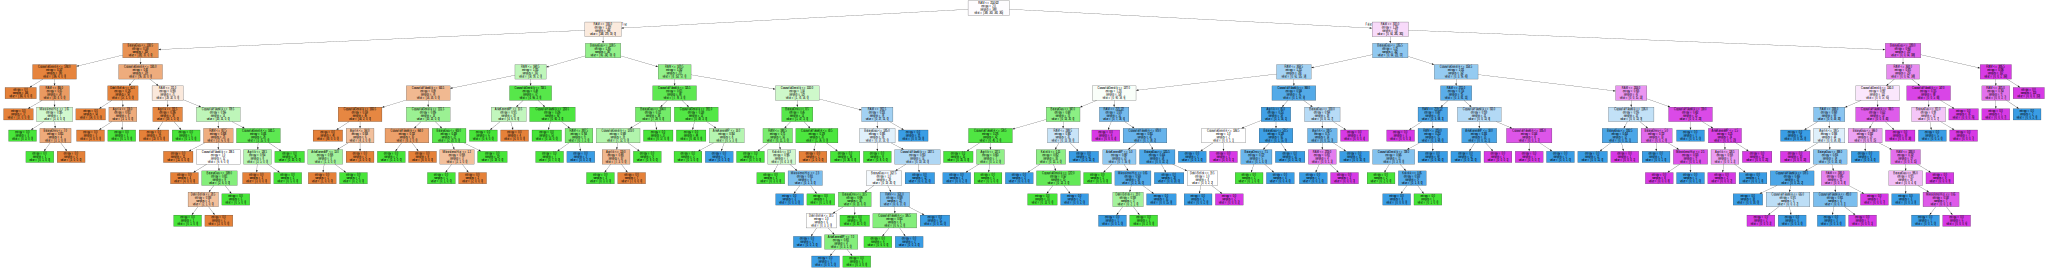

In [437]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(cart, out_file = None, feature_names = X.columns, filled = True))
display(SVG(graph.pipe(format = 'svg')))

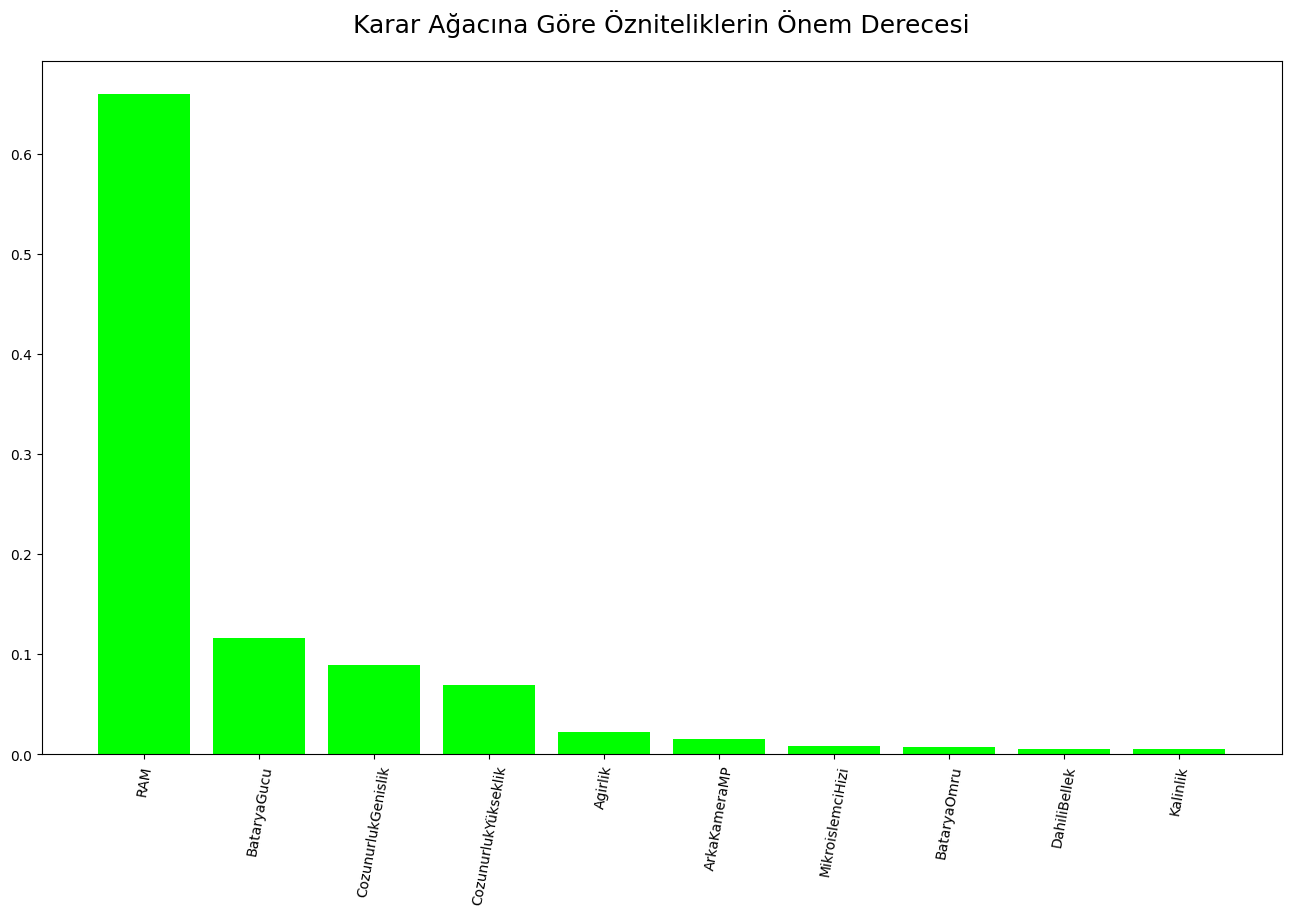

In [438]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

# KNN Sınıflandırma Algoritması

In [439]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [440]:
knn_model

KNeighborsClassifier()

In [441]:
y_pred = knn_model.predict(X)

In [442]:
accuracy_score(y, y_pred)

0.9355

In [443]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)

[[491   9   0   0]
 [ 20 469  11   0]
 [  0  28 444  28]
 [  0   5  28 467]]


In [444]:
cross_val_score(cart_model, X, y, cv = 10)

array([0.82 , 0.84 , 0.85 , 0.87 , 0.865, 0.845, 0.865, 0.845, 0.85 ,
       0.845])

In [445]:
cross_val_score(cart_model, X, y, cv = 10).mean()

0.8494999999999999

In [446]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.92      0.94      0.93       500
           2       0.92      0.89      0.90       500
           3       0.94      0.93      0.94       500

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



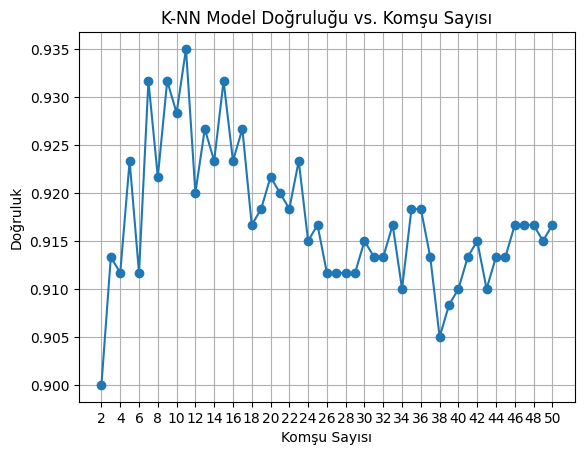

In [447]:
k_values = range(2, 51)

# Her komşu sayısı için modelin doğruluk skorlarını depolamak için boş bir liste oluşturun
accuracy_scores = []

# Her bir komşu sayısı için K-NN modelini eğit ve test et
for k in k_values:
    # K-NN modelini oluştur
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Modeli eğit
    knn.fit(X_train, y_train)
    
    # Modelin doğruluğunu hesapla ve doğruluk skorlarını listeye ekle
    accuracy_scores.append(knn.score(X_test, y_test))

# Doğruluk skorlarını görselleştir
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('K-NN Model Doğruluğu vs. Komşu Sayısı')
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.xticks(np.arange(2, 51, step=2))  # x eksenindeki komşu sayılarını belirleme
plt.grid(True)
plt.show()

# Model seti doğruluğu

Knn için en iyi: 0.9355

Decision tree için en iyi: 0.865

Gaussian için en iyi: 0.824